In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageEnhance, ImageFilter
import numpy as np
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Build the basic neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
750/750 [==============================] - 14s 5ms/step - loss: 0.2065 - accuracy: 0.9376 - val_loss: 0.0748 - val_accuracy: 0.9786
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.0544 - val_accuracy: 0.9836
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0392 - accuracy: 0.9876 - val_loss: 0.0436 - val_accuracy: 0.9872
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0424 - val_accuracy: 0.9881
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0308 - accuracy: 0.9904
Test accuracy: 0.9904000163078308


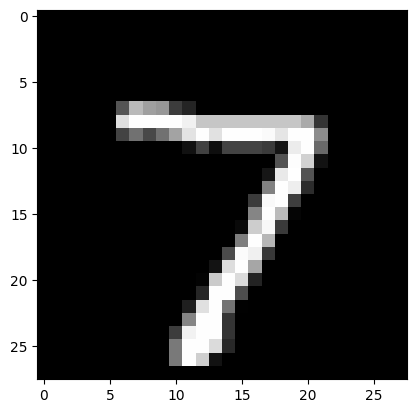

In [4]:
plotData = test_images[0,:,:,:]
plotData = plotData.reshape(28, 28)
plt.gray() # use this line if you don't want to see it in color
plt.imshow(plotData)
plt.show()

In [5]:
# brightness_value = 1000  # Set your desired brightness value (between 0 and 1)
# #saturation_value = 0.5  # Set your desired saturation value (between 0 and 1)

# test_datagen = ImageDataGenerator(
#     brightness_range=[brightness_value, brightness_value],
#     #saturation_range=[saturation_value, saturation_value],
# )
# batch_size=64
# augmented_test_data = test_datagen.flow(test_images, test_labels, batch_size=batch_size, shuffle=False)

# # Evaluate the model on the augmented test set
# test_loss_augmented, test_acc_augmented = model.evaluate(augmented_test_data)
# print(f'Test accuracy on augmented test set: {test_acc_augmented}')


In [6]:
# Function to apply brightness using Pillow
def apply_brightness(images, factor=1.5):
    brightened_images = [ImageEnhance.Brightness(Image.fromarray(np.squeeze(image * 255).astype('uint8'))).enhance(factor) for image in images]
    return np.array([np.array(image) / 255.0 for image in brightened_images])

# Function to apply blur using Pillow
def apply_blur(images, radius=2):
    blurred_images = [Image.fromarray(np.squeeze(image * 255).astype('uint8')).filter(ImageFilter.GaussianBlur(radius)) for image in images]
    return np.array([np.array(image) / 255.0 for image in blurred_images])

# Function to apply noise using Pillow
def apply_noise(images, factor=0.2):
    noisy_images = [np.clip(image + factor * np.random.normal(loc=0, scale=1, size=image.shape), 0, 1.0) for image in images]
    return np.array(noisy_images)

# Function to apply contrast using Pillow
def apply_contrast(images, factor=1.5):
    enhanced_images = [ImageEnhance.Contrast(Image.fromarray(np.squeeze(image * 255).astype('uint8'))).enhance(factor) for image in images]
    return np.array([np.array(image) / 255.0 for image in enhanced_images])



In [7]:
def augment_data(brightness_factor,blur_radius,noise_factor, contrast_factor):
    # Adjust the brightness factor
    brightness_factor = brightness_factor  # Set the desired brightness factor, original = 1
    brightened_test_images = apply_brightness(test_images, brightness_factor)

    # Adjust the blur radius
    blur_radius = blur_radius  # Set the desired blur radius, original = 0 
    blurred_and_brightened_test_images = apply_blur(brightened_test_images, blur_radius)

    # Adjust the noise factor
    noise_factor = noise_factor  # Set the desired noise factor, original = 0
    noisy_blurred_and_brightened_test_images = apply_noise(blurred_and_brightened_test_images, noise_factor)

    # Adjust the contrast factor
    contrast_factor = contrast_factor  # Set the desired contrast factor, original = 1
    final_augmented_test_images = apply_contrast(noisy_blurred_and_brightened_test_images, contrast_factor)

    # Ensure that the final augmented test images have the correct shape
    final_augmented_test_images_with_channel = np.expand_dims(final_augmented_test_images, axis=-1)

    # Evaluate the model on the fully augmented test set
    test_loss_augmented, test_acc_augmented = model.evaluate(final_augmented_test_images_with_channel, test_labels)
    print(f'Test accuracy on fully augmented test set: {test_acc_augmented}')

In [8]:
augment_data(1.5,.1,10,1.5)

313/313 [==============================] - 1s 3ms/step - loss: 4.3698 - accuracy: 0.1066
Test accuracy on fully augmented test set: 0.10660000145435333


In [9]:
# Adjust the brightness factor low = .1 high = 1.5
brightness_factor = 1.5  # Set the desired brightness factor, original = 1
brightened_test_images = apply_brightness(test_images, brightness_factor)

# Adjust the blur radius low = 0 high = 1
blur_radius = 1  # Set the desired blur radius, original = 0 
blurred_and_brightened_test_images = apply_blur(brightened_test_images, blur_radius)

# Adjust the noise factor low = 0 high = .1
noise_factor = 0.1  # Set the desired noise factor, original = 0
noisy_blurred_and_brightened_test_images = apply_noise(blurred_and_brightened_test_images, noise_factor)

# Adjust the contrast factor low = 2 high = 5
contrast_factor = 5  # Set the desired contrast factor, original = 1
final_augmented_test_images = apply_contrast(noisy_blurred_and_brightened_test_images, contrast_factor)

# Ensure that the final augmented test images have the correct shape
final_augmented_test_images_with_channel = np.expand_dims(final_augmented_test_images, axis=-1)

# Evaluate the model on the fully augmented test set
test_loss_augmented, test_acc_augmented = model.evaluate(final_augmented_test_images_with_channel, test_labels)
print(f'Test accuracy on fully augmented test set: {test_acc_augmented}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0.9719
Test accuracy on fully augmented test set: 0.9718999862670898


In [10]:
brightened_test_images.shape

(10000, 28, 28)

In [11]:
blurred_and_brightened_test_images.shape

(10000, 28, 28)

In [12]:
noisy_blurred_and_brightened_test_images.shape

(10000, 28, 28)

In [13]:
final_augmented_test_images.shape

(10000, 28, 28)

In [14]:
final_augmented_test_images_with_channel.shape

(10000, 28, 28, 1)

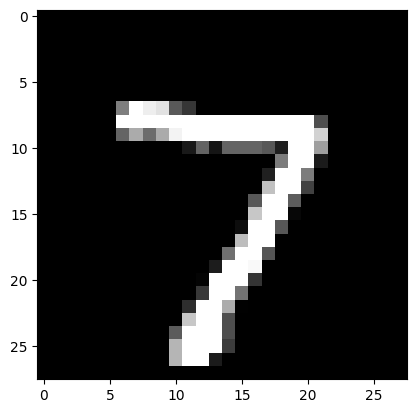

In [15]:
plotData = brightened_test_images[0,:,:]
plotData = plotData.reshape(28, 28)
plt.gray() # use this line if you don't want to see it in color
plt.imshow(plotData)
plt.show()

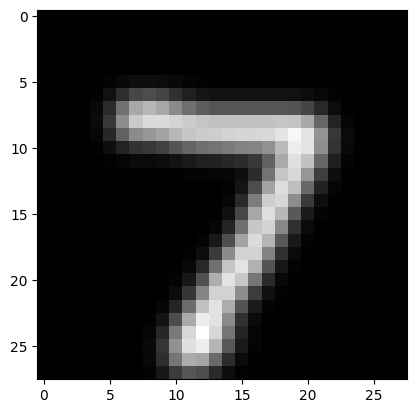

In [16]:
plotData = blurred_and_brightened_test_images[0,:,:]
plotData = plotData.reshape(28, 28)
plt.gray() # use this line if you don't want to see it in color
plt.imshow(plotData)
plt.show()

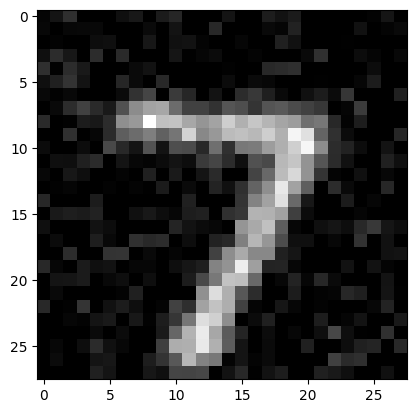

In [17]:
plotData = noisy_blurred_and_brightened_test_images[0,:,:]
plotData = plotData.reshape(28, 28)
plt.gray() # use this line if you don't want to see it in color
plt.imshow(plotData)
plt.show()

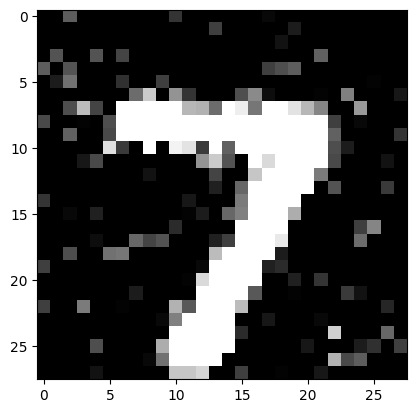

In [18]:
plotData = final_augmented_test_images[0,:,:]
plotData = plotData.reshape(28, 28)
plt.gray() # use this line if you don't want to see it in color
plt.imshow(plotData)
plt.show()

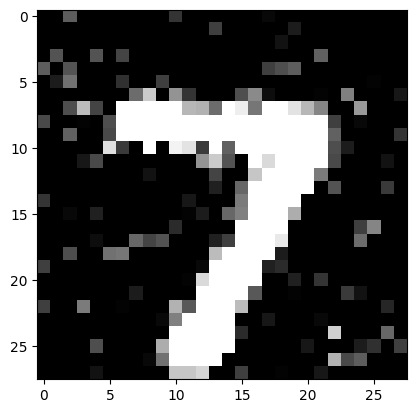

In [19]:
plotData = final_augmented_test_images_with_channel[0,:,:,0]
plotData = plotData.reshape(28, 28)
plt.gray() # use this line if you don't want to see it in color
plt.imshow(plotData)
plt.show()

In [20]:
def displayMNIST(imageAsArray):
    imageAsArray = imageAsArray.reshape(28, 28);
    plt.imshow(imageAsArray, cmap='gray')
    plt.show()

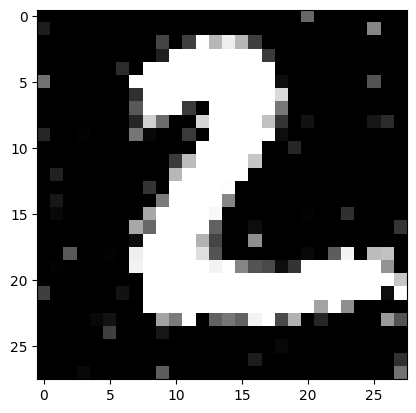

In [21]:
displayMNIST(final_augmented_test_images[1,:,:])
